In [50]:
import matplotlib.pyplot as plt
from keras import datasets, layers, models

In [51]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

CIFAR-10 stands for Canadian Institute For Advanced Research 10, which is a dataset of 50,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is commonly used for image classification tasks in machine learning and computer vision.


The 10 classes in the CIFAR-10 dataset are:

1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck


In [52]:
X_train.shape

(50000, 32, 32, 3)

In [53]:
X_test.shape

(10000, 32, 32, 3)

In [54]:
y_train.shape

(50000, 1)

In [55]:
y_test.shape

(10000, 1)

In [56]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [57]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.xlabel(class_names[y_train[index][0]])

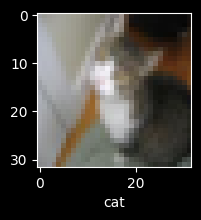

In [58]:
plot_sample(101)

In [59]:
X_train = X_train / 255
X_test = X_test / 255

In [60]:
ann = models.Sequential(
    layers=[
        layers.Flatten(input_shape=(32, 32, 3), name="input"),
        layers.Dense(3200, activation="relu", name="layer1"),
        layers.Dense(1600, activation="relu", name="layer2"),
        layers.Dense(800, activation="relu", name="layer3"),
        layers.Dense(10, activation="sigmoid", name="output"),
    ],
    name="ann",
)

In [61]:
ann.layers

In [62]:
ann.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 3072)              0         
                                                                 
 layer1 (Dense)              (None, 3200)              9833600   
                                                                 
 layer2 (Dense)              (None, 1600)              5121600   
                                                                 
 layer3 (Dense)              (None, 800)               1280800   
                                                                 
 output (Dense)              (None, 10)                8010      
                                                                 
Total params: 16244010 (61.97 MB)
Trainable params: 16244010 (61.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
ann.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [64]:
ann.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10


2023-07-31 17:26:36.983747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 107.2446 - accuracy: 0.1096

2023-07-31 17:27:22.358925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 47s 33ms/step - loss: 107.2446 - accuracy: 0.1096 - val_loss: 95.6732 - val_accuracy: 0.1400
Epoch 2/10
1407/1407 [==============================] - 45s 32ms/step - loss: 85.2906 - accuracy: 0.1123 - val_loss: 83.1520 - val_accuracy: 0.1054
Epoch 3/10
1407/1407 [==============================] - 43s 30ms/step - loss: 81.7340 - accuracy: 0.1158 - val_loss: 133.6089 - val_accuracy: 0.1058
Epoch 4/10
1407/1407 [==============================] - 42s 30ms/step - loss: 74.7730 - accuracy: 0.1232 - val_loss: 131.4609 - val_accuracy: 0.0984
Epoch 5/10
1407/1407 [==============================] - 45s 32ms/step - loss: 72.9887 - accuracy: 0.1197 - val_loss: 74.5341 - val_accuracy: 0.1148
Epoch 6/10
1407/1407 [==============================] - 44s 31ms/step - loss: 69.2966 - accuracy: 0.1256 - val_loss: 67.7450 - val_accuracy: 0.1588
Epoch 7/10
1407/1407 [==============================] - 47s 33ms/step - loss: 69.6184 - accuracy: 0.1300 - val_loss: 26.

In [65]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 44.1941 - accuracy: 0.1535


[44.194129943847656, 0.1535000056028366]

In [66]:
y_pred = ann.predict(X_test)

 34/313 [==>...........................] - ETA: 1s

2023-07-31 17:34:04.663715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step


In [67]:
cnn = models.Sequential(
    layers=[
        layers.Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation="relu",
            input_shape=(32, 32, 3),
            name="conv1",
        ),
        layers.MaxPooling2D((2, 2), name="pool1"),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", name="conv2"),
        layers.MaxPooling2D((2, 2), name="pool2"),
        layers.Flatten(name="flatten"),
        layers.Dense(64, activation="relu", name="dense1"),
        layers.Dense(10, activation="softmax", name="dense2"),
    ],
    name="cnn",
)

In [68]:
cnn.layers

In [69]:
cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 pool1 (MaxPooling2D)        (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 6, 6, 64)          0         
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense1 (Dense)              (None, 64)                147520    
                                                                 
 dense2 (Dense)              (None, 10)                650     

In [70]:
cnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [71]:
cnn.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10


2023-07-31 17:34:13.003427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 1.4951 - accuracy: 0.4639

2023-07-31 17:34:31.734773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 20s 14ms/step - loss: 1.4951 - accuracy: 0.4639 - val_loss: 1.3310 - val_accuracy: 0.5412
Epoch 2/10
1407/1407 [==============================] - 19s 13ms/step - loss: 1.1896 - accuracy: 0.5829 - val_loss: 1.1125 - val_accuracy: 0.6210
Epoch 3/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.0954 - accuracy: 0.6231 - val_loss: 1.1599 - val_accuracy: 0.6094
Epoch 4/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.1428 - accuracy: 0.6190 - val_loss: 1.1487 - val_accuracy: 0.6230
Epoch 5/10
1407/1407 [==============================] - 19s 14ms/step - loss: 1.2721 - accuracy: 0.6084 - val_loss: 1.3602 - val_accuracy: 0.6018
Epoch 6/10
1407/1407 [==============================] - 19s 14ms/step - loss: 1.5698 - accuracy: 0.5843 - val_loss: 1.7416 - val_accuracy: 0.5506
Epoch 7/10
1407/1407 [==============================] - 19s 14ms/step - loss: 2.1749 - accuracy: 0.5577 - val_loss: 2.7093 - val_accura

In [72]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 15.6689 - accuracy: 0.4231


[15.668904304504395, 0.42309999465942383]

In [73]:
y_pred = cnn.predict(X_test)

 19/313 [>.............................] - ETA: 1s

2023-07-31 17:37:59.246542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step
